# 02 Linear Q agent

#### 👉 Let's use a linear model to approximate the q-value function.

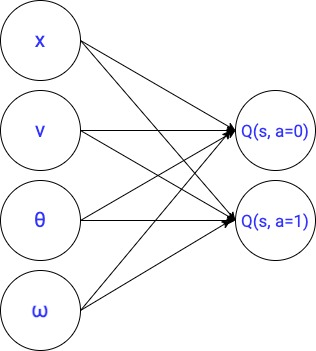

In [7]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [14]:
import gym
env = gym.make('CartPole-v1')

## Hyperparameters

In [15]:
# Bad hyper-parameters
hparams = {
    'learning_rate': 9.214691713730938e-05,
    'discount_factor': 0.99,
    'batch_size': 32,
    'memory_size': 10000,
    'freq_steps_train': 16,
    'freq_steps_update_target': 1000,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 1,
    'max_grad_norm': 1,
    'normalize_state': True,
    'epsilon_start': 0.9,
    'epsilon_end': 0.08474621504763855,
    'steps_epsilon_decay': 100000
}

SEED = 4291201652

## ⚠️ Fix random seeds

In [16]:
from src.utils import set_seed
set_seed(env, SEED)

## QAgent

In [17]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams)

10 parameters


## Train the agent 🏋️

In [18]:
from src.loops import train
train(agent, env, n_episodes=2000)

 12%|█████████                                                                | 248/2000 [00:00<00:07, 233.54it/s]

Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


 21%|███████████████▌                                                         | 428/2000 [00:01<00:07, 202.63it/s]

Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


 32%|███████████████████████                                                  | 632/2000 [00:02<00:07, 175.53it/s]

Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


 41%|██████████████████████████████▏                                          | 826/2000 [00:03<00:08, 137.48it/s]

Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


 51%|████████████████████████████████████▌                                   | 1014/2000 [00:05<00:06, 143.57it/s]

Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


 61%|████████████████████████████████████████████▋                            | 1224/2000 [00:06<00:08, 94.91it/s]

Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


 71%|███████████████████████████████████████████████████▎                    | 1425/2000 [00:08<00:04, 141.54it/s]

Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


 81%|██████████████████████████████████████████████████████████▌             | 1625/2000 [00:09<00:02, 139.01it/s]

Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


 91%|█████████████████████████████████████████████████████████████████▊      | 1829/2000 [00:10<00:01, 167.80it/s]

Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


100%|████████████████████████████████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.65it/s]

Reward mean: 9.41, std: 0.84
Num steps mean: 9.41, std: 0.84


## Evaluate the agent ⏱️

In [19]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.01
)

100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 653.21it/s]


In [20]:
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 9.42, std 0.77


## Let's see how far we got in each attempt

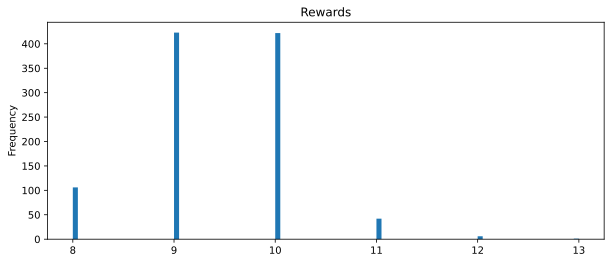

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()